In [101]:
df_train = catalog.load("train")
df_train.head()

[10/28/22 14:04:52] INFO     Loading data from 'train' (CSVDataSet)...                          ]8;id=391091;file://C:\Users\Sean\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-kedro-3OK2H3mb-py3.10\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=887164;file://C:\Users\Sean\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-kedro-3OK2H3mb-py3.10\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [102]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


[10/28/22 14:04:58] WARNING  C:\Users\Sean\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-kedro-3O ]8;id=277926;file://C:\Users\Sean\.pyenv\pyenv-win\versions\3.10.7\lib\warnings.py\warnings.py]8;;\:]8;id=486948;file://C:\Users\Sean\.pyenv\pyenv-win\versions\3.10.7\lib\warnings.py#109\109]8;;\
                             K2H3mb-py3.10\lib\site-packages\missingno\missingno.py:73:                            
                             MatplotlibDeprecationWarning: The 'b' parameter of grid() has been                    
                             renamed 'visible' since Matplotlib 3.5; support for the old name will                 
                             be dropped two minor releases later.                                                  
                               ax0.grid(b=False)                                                                   
                                                                                                                   

                    WARNING  C:\Users\Sean\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-kedro-3O ]8;id=468440;file://C:\Users\Sean\.pyenv\pyenv-win\versions\3.10.7\lib\warnings.py\warnings.py]8;;\:]8;id=510105;file://C:\Users\Sean\.pyenv\pyenv-win\versions\3.10.7\lib\warnings.py#109\109]8;;\
                             K2H3mb-py3.10\lib\site-packages\missingno\missingno.py:142:                           
                             MatplotlibDeprecationWarning: The 'b' parameter of grid() has been                    
                             renamed 'visible' since Matplotlib 3.5; support for the old name will                 
                             be dropped two minor releases later.                                                  
                               ax1.grid(b=False)                                                                   
                                                                                                                   

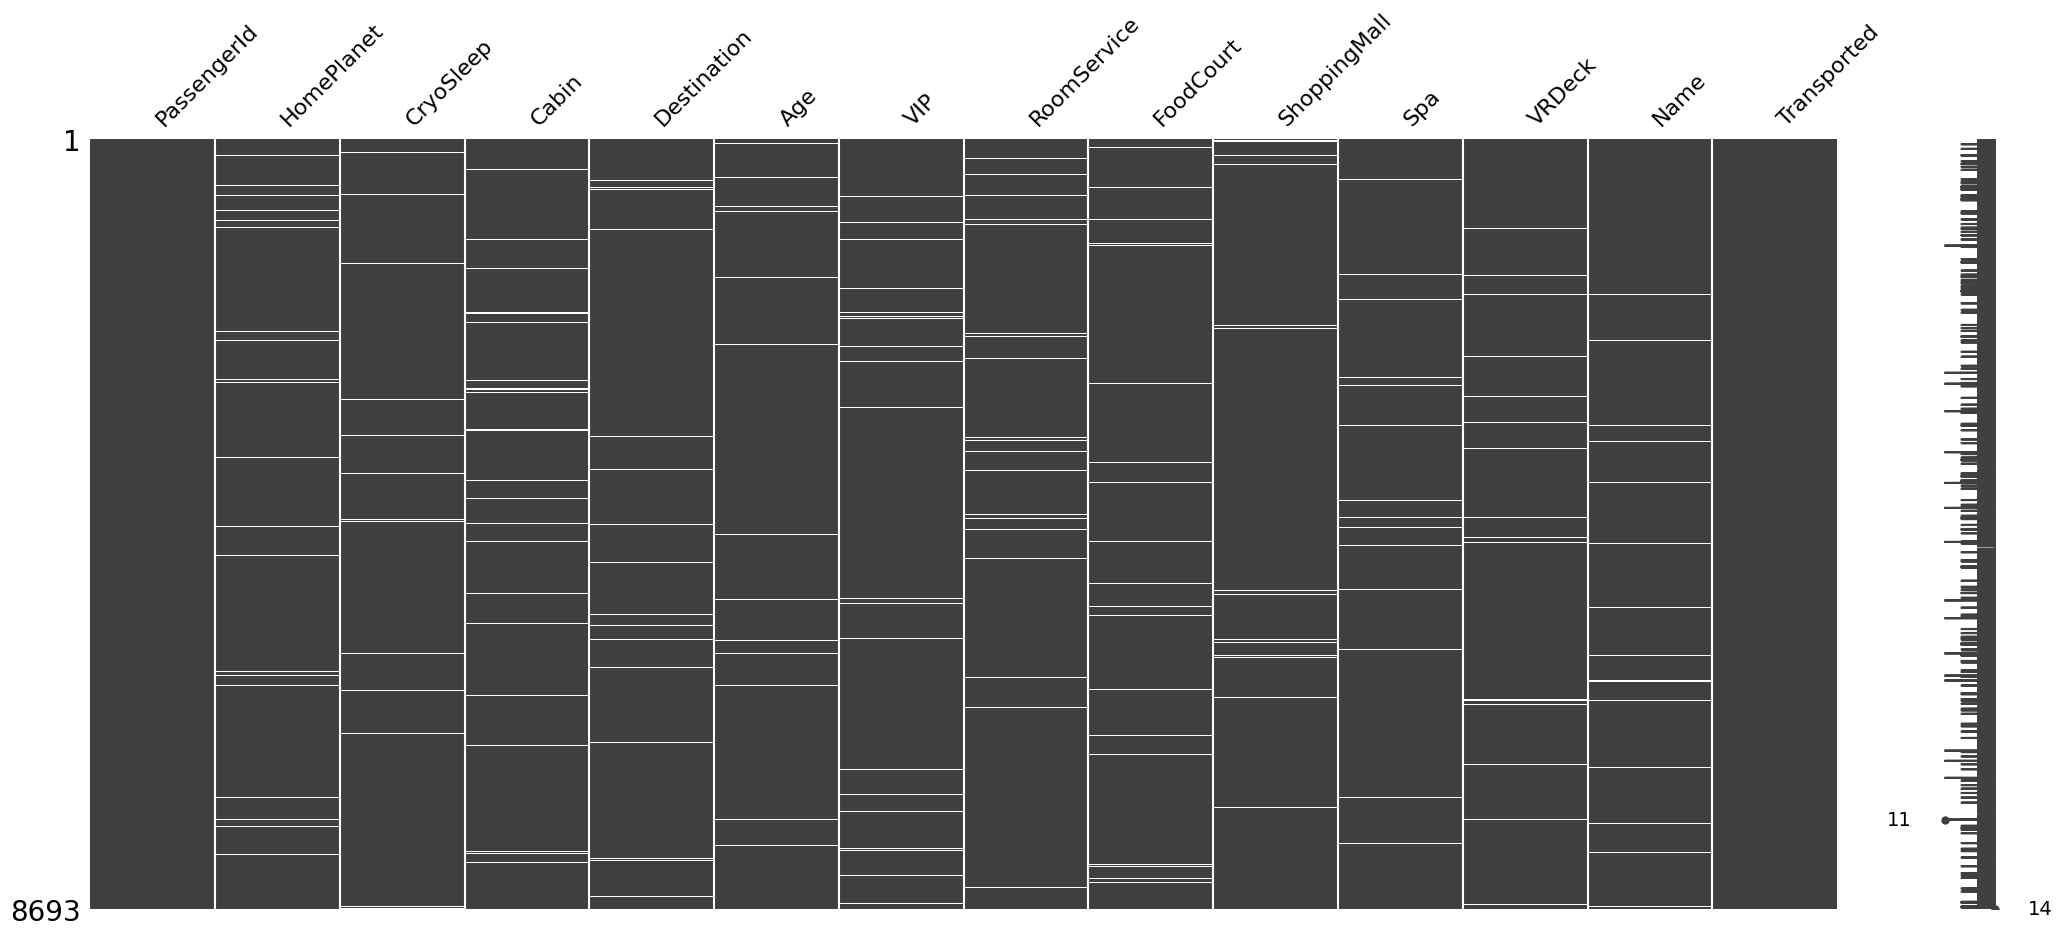

In [103]:
#!pip install missingno
import missingno
missingno.matrix(df_train)

In [104]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**missing values**: let's see what matters and inspect individual proprties to see if we just fill with values or drop.

To Do:
- create `travel alone` param
- enum HomePlanet
- CryoSleep to bool
- split cabin into deck, num, side
- Destination into enum
- VIP to bool
- calc total spending
- (has family)

## Travelling alone?

In [105]:
# traveling alone

# split out group id
# create list of non-unique group ids
# create alone property, set true if not in group list

split_df = df_train["PassengerId"].str.split(pat="_",expand=True)
split_df.head()

,0,1
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01


In [106]:
alone = split_df[0].value_counts() == 1
alone.head()

4498    False
8168    False
8728    False
8796    False
8956    False
Name: 0, dtype: bool

In [107]:
split_df = split_df.merge(alone.rename("alone"), left_on=0, right_index=True)

In [108]:
df_train["alone"] = split_df['alone']
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,alone
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True


## Homeplanet

In [116]:
df_train["HomePlanet"].value_counts()

0    4602
1    2131
2    1759
3     201
Name: HomePlanet, dtype: int64

In [113]:
#!pip install sklearn

In [114]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train['HomePlanet'])
df_train['HomePlanet'] = le.transform(df_train['HomePlanet'])
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,alone
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True


## CryoSleep

In [117]:
le.fit(df_train['CryoSleep'])
df_train['CryoSleep'] = le.transform(df_train['CryoSleep'])
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,alone
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True


In [118]:
df_train["CryoSleep"].value_counts()

0    5439
1    3037
2     217
Name: CryoSleep, dtype: int64

## Cabin

In [119]:
df_cab = df_train["Cabin"].str.split(pat="/",expand=True)
df_cab.head()

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [120]:
df_train["Deck"] = df_cab[0]
df_train["Room"] = df_cab[1]
df_train["Side"] = df_cab[2]
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,alone,Deck,Room,Side
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,B,0,P
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,F,0,S
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,A,0,S
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,A,0,S
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,F,1,S


In [121]:
le.fit(df_train['Deck'])
df_train['Deck'] = le.transform(df_train['Deck'])
le.fit(df_train['Side'])
df_train['Side'] = le.transform(df_train['Side'])
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,alone,Deck,Room,Side
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,0,0
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,5,0,1
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,0,0,1
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,0,0,1
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,5,1,1


In [123]:
df_train['Side'].value_counts()

1    4288
0    4206
2     199
Name: Side, dtype: int64

In [124]:
df_train['Deck'].value_counts()

5    2794
6    2559
4     876
1     779
2     747
3     478
0     256
8     199
7       5
Name: Deck, dtype: int64

In [132]:
# let's drop cabin
df_train = df_train.drop("Cabin", axis=1)

## Destination


In [127]:
df_train['Destination'].value_counts()

2    5915
0    1800
1     796
3     182
Name: Destination, dtype: int64

In [126]:
le.fit(df_train['Destination'])
df_train['Destination'] = le.transform(df_train['Destination'])

## VIP

In [128]:
le.fit(df_train['VIP'])
df_train['VIP'] = le.transform(df_train['VIP'])

## check for Nan

In [144]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
alone           0
Deck            0
Room            0
Side            0
TotalSpend      0
dtype: int64

let's:
- all price related cols to 0.0
- age to avg
- Room to 0
- name to "no Name

In [135]:
cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
df_train[cols]=df_train[cols].fillna(0.0)

In [139]:
df_train["Age"].median()

27.0

In [140]:
df_train["Age"] = df_train["Age"].fillna(27)

In [142]:
df_train["Name"] = df_train["Name"].fillna("No Name")

In [143]:
df_train["Room"] = df_train["Room"].fillna(0)

In [145]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
alone           0
Deck            0
Room            0
Side            0
TotalSpend      0
dtype: int64

## Total Spend

In [ ]:
# let's make Nan to 

In [146]:
df_train["TotalSpend"] = df_train["RoomService"] + df_train["FoodCourt"] + df_train["ShoppingMall"] + df_train["Spa"] + df_train["VRDeck"]
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,alone,Deck,Room,Side,TotalSpend
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,0,0,0.0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,5,0,1,736.0
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,0,0,1,10383.0
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,0,0,1,5176.0
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,5,1,1,1091.0


In [147]:
corr_matrix = df_train.corr(method='pearson')
corr_matrix.style.background_gradient(cmap='coolwarm')

[10/28/22 14:21:56] WARNING  C:\Users\Sean\AppData\Local\Temp\ipykernel_1464\1520251892.py:1:       ]8;id=78177;file://C:\Users\Sean\.pyenv\pyenv-win\versions\3.10.7\lib\warnings.py\warnings.py]8;;\:]8;id=702992;file://C:\Users\Sean\.pyenv\pyenv-win\versions\3.10.7\lib\warnings.py#109\109]8;;\
                             FutureWarning: The default value of numeric_only in DataFrame.corr is                 
                             deprecated. In a future version, it will default to False. Select only                
                             valid columns or specify the value of numeric_only to silence this                    
                             warning.                                                                              
                               corr_matrix = df_train.corr(method='pearson')                                       
                                                                                                                   

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,alone,Deck,Side,TotalSpend
HomePlanet,1.000000,0.068726,0.042618,0.122943,0.044255,0.192189,0.056321,0.088970,0.045252,0.035631,0.107755,-0.165009,-0.347563,0.006099,0.128921
CryoSleep,0.068726,1.000000,-0.085571,-0.068816,-0.023407,-0.216689,-0.182029,-0.188532,-0.178382,-0.171721,0.404716,-0.092221,0.021737,0.020462,-0.336021
Destination,0.042618,-0.085571,1.000000,-0.004342,-0.024905,0.043735,-0.109558,0.022982,-0.052915,-0.072850,-0.104817,0.051296,0.166499,-0.015758,-0.097887
Age,0.122943,-0.068816,-0.004342,1.000000,0.032434,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233,0.133804,-0.230005,0.011633,0.184628
VIP,0.044255,-0.023407,-0.024905,0.032434,1.000000,0.038011,0.054756,-0.009496,0.020355,0.054623,-0.014260,-0.012758,-0.060580,0.005636,0.068378
RoomService,0.192189,-0.216689,0.043735,0.068629,0.038011,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,0.019338,-0.016793,0.000868,0.234374
FoodCourt,0.056321,-0.182029,-0.109558,0.127390,0.054756,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.066683,-0.303889,0.018176,0.742608
ShoppingMall,0.088970,-0.188532,0.022982,0.033148,-0.009496,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,0.029095,-0.033944,-0.021976,0.220529
Spa,0.045252,-0.178382,-0.052915,0.120946,0.020355,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.043639,-0.202957,0.012453,0.592656
VRDeck,0.035631,-0.171721,-0.072850,0.099590,0.054623,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,-0.044293,-0.243610,-0.010342,0.585684
